# TrulyFitAI


## Project Motivation
Many people want to stay fit, eat right, and follow the best workout plan — but it’s not always easy to know what actually works for you. Most fitness tips online are one-size-fits-all, ignoring important personal details like your body type, gender, or fitness goal. That’s why people often struggle to see results or lose motivation along the way.

This project aims to fix that by creating a smart fitness recommendation system that predict how many calories is needed per day base off the user profile and gives personalized exercise and meal plans based on who you are and what you want to achieve. Using clean, structured data and information from kaggle, we can match a user’s details — like their BMI category and goal (fat burn or muscle gain) — to realistic meal plans and exercise schedule that actually make sense for them.






##  1. Problem Statement

Modern fitness journeys often fail due to one-size-fits-all meal and workout plans that ignore individual differences in body type, metabolism, goals, and adherence levels.  
People struggle to:
- Know *how many calories they need per day* to reach their goals.  
- Get *personalized meal and exercise plans* that fit their lifestyle.  
- Receive *adaptive recommendations* based on their real progress over time.  

This project aims to solve these problems using *Machine Learning (ML)* and *data-driven personalization*.

---

## 2. Project Objective

To build an *AI-powered fitness recommendation system* that:
1. Predicts a user’s *daily calorie requirement* based on personal attributes and goals.  
2. Generates a *personalized meal plan* and *workout routine* that align with the calorie target and goal.  
3. Tracks user progress over time (weight, adherence, energy level) to *adapt recommendations* dynamically.  

The end goal is to provide an intelligent, continuously learning fitness assistant.



##  4. Data Requirements and Sources

### A. User Profile Dataset
*Purpose:* To predict calorie needs and personalize recommendations.

| Feature | Type | Description |
|----------|------|-------------|
| user_id | ID | Unique identifier |
| name | string | User name |
| age | numeric | User’s age |
| gender | categorical | Male/Female |
| height_cm | numeric | Height in cm |
| weight_kg | numeric | Weight in kg |
| goal | categorical | lose_weight / maintain / gain_muscle |
| bmi | numeric | Calculated as weight / (height²) |
| experience_level | categorical | beginner / intermediate / advanced |
| equipment | categorical | home / gym / none |
| calorie_target | numeric | (Label) Daily calorie target — predicted or derived |

 *Source:* Provided 20k user profile dataset (lifestyle.csv)

---

### B. Meal Dataset
*Purpose:* To generate balanced, goal-aligned meal recommendations.

| Feature | Description |
|----------|-------------|
| meal_id | Unique meal identifier |
| meal_name | Meal name (e.g., "Grilled Chicken with Rice") |
| calories | Total calories per portion |
| protein | Protein content (g) |
| carbs | Carbohydrates (g) |
| fats | Fat content (g) |
| category | e.g., breakfast/lunch/dinner/snack |
| goal_tag | lose_weight / gain_muscle / maintain |
| source | e.g., USDA API / manually curated |

 *Source:* USDA FoodData Central API (for open-source nutrition data) and lifestyle.csv

---

### C. Exercise Dataset
*Purpose:* To recommend workouts aligned with goal, equipment, and level.

| Feature | Description |
|----------|-------------|
| exercise_id | Unique ID |
| exercise_name | e.g., "Push-ups" |
| target_muscle | e.g., chest, legs |
| difficulty | beginner / intermediate / advanced |
| equipment | bodyweight / dumbbell / barbell / none |
| duration_min | Average duration |
| calories_burned | Estimated calories burned per session |

 *Source:* curated from the lifestyle.csv  dataset

---

## 5. System Architecture

```
flowchart TD
    A[User Profile Input] --> B[Calorie Prediction Model]
    B --> C[Calorie Target (kcal/day)]
    C --> D[Meal Plan Generator]
    C --> E[Workout Plan Generator]
    D & E --> F[Personalized Recommendation Output]
    F --> G[User Progress Logging]
    G --> H[Adaptive Learning Model]
    H --> D & E
```

## Dataset
* link https://www.kaggle.com/datasets/jockeroika/life-style-data
* Data dictionary https://www.kaggle.com/datasets/jockeroika/life-style-data

## Data Dictionary
* Age	Age of the participant (in years).
* Gender	Biological gender (Male/Female).
* Weight (kg)	Weight of the individual in kilograms.
* Height (m)	Height of the individual in meters.
* Max_BPM	Maximum heart rate recorded during a workout session.
* Avg_BPM	Average heart rate maintained during the session.
* Resting_BPM	Resting heart rate before starting the workout.
* Session_Duration (hours)	Duration of the workout session in hours.
* Calories_Burned	Total calories burned during the session.
* Workout_Type	Type of workout performed (e.g., Strength, HIIT, Cardio).
* Fat_Percentage	Body fat percentage of the individual.
* Water_Intake (liters)	Average daily water consumption in liters.
* Workout_Frequency (days/week)	Number of workout days per week.
* Experience_Level	Fitness experience level (1=Beginner, 2=Intermediate, 3=Advanced).
* BMI	Body Mass Index, a measure of body fat based on height and weight.
* Daily meals frequency	Number of meals consumed daily.
* Physical exercise	Indicates the type or frequency of physical activity.
* Carbs	Daily carbohydrate intake (grams).
* Proteins	Daily protein intake (grams).
* Fats	Daily fat intake (grams).
* Calories	Total daily calorie intake from food.
* meal_name	Name of the meal (e.g., Breakfast, Lunch, Dinner).
* meal_type	Type of meal (e.g., Snack, Main, Beverage).
* diet_type	Type of diet followed (e.g., Keto, Vegan, Balanced).
* sugar_g	Sugar content in grams per meal.
* sodium_mg	Sodium content in milligrams per meal.
* cholesterol_mg	Cholesterol content in milligrams per meal.
* serving_size_g	Portion size of the meal in grams.
* cooking_method	Cooking method used (e.g., Boiled, Fried, Grilled).
* prep_time_min	Preparation time in minutes.
* cook_time_min	Cooking time in minutes.
* rating	Meal or workout rating (typically 1–5 scale).
* is_healthy	Boolean indicator (True/False) of whether the meal/workout is healthy.
* Name of Exercise	Name of the exercise performed.
* Sets	Number of sets completed in the exercise.
* Reps	Number of repetitions per set.
* Benefit	Description of the exercise’s physical benefit.
* Burns Calories (per 30 min)	Estimated calories burned in 30 minutes of that exercise.
* Target Muscle Group	Main muscle group targeted by the exercise.
* Equipment Needed	Equipment required to perform the exercise.
* Difficulty Level	Exercise difficulty level (Beginner, Intermediate, Advanced).
* Body Part	Primary body part involved (e.g., Arms, Legs, Chest).
* Type of Muscle	Type of muscle engaged (e.g., Upper, Core, Grip Strength).
* Workout	Specific workout or exercise name.

In [1]:
# read in the dataset
import pandas as pd
df = pd.read_csv("../data/raw/Final_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [2]:
# Getting the columns
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [3]:
df.shape

(20000, 54)

The dataset is composed of 20,000 rows and 54 columns

## Data processing: Handling missing values, standardization, feature engineering


#### 1. **Feature Selection**
- Using analysis (**ANOVA**, **Mutual Information**) to choose informative categorical features.  
- Based on our results:  
  - **we Keep:** `Body_Part`, `Benefit`, `Equipment_Needed`, we enventually drop this as they have little predictive value
  - **we Drop:** Features with zero mutual information (no predictive value).

---

#### 2. **Data Preprocessing**
- **Encode Categorical Features:**   
  - Use `OneHotEncoder` for features with **low cardinality**.  

- **Scale Numerical Features:**  
  - Apply `StandardScaler` or `MinMaxScaler` on numerical features like:
    - `bmi`
    - `height`
    - `weight`
    - `age`
    - `lean_mass`
    - `fat_percentage`
    - `protein_per_g`
  - Scaling ensures stable model performance and better convergence for most regression algorithms.

---

#### 3. Outlier detection and removal
We use boxplot to check the outliers in the dataset and use Isolation forest to remove the outlier

#### 4. Preprocessing on Columns name
* we replace the columns with space inbetween thier name with underscore
* covert them to lower case
---

We build a preprocessing pipeline to handle all this transformation using sklearn pipeline class. 

**Handling Missing Values":**
- We fill the missing values with the median values since the median values is more robust to outlier

**Log Transformation:**
- Carry out log transformation on the numerical to address skewness. This making the shape close to normal distribution

* This is capture in the `data preprocessing notebook` https://github.com/abiolaks/trulyfit_project_ai6/blob/main/TrulyFitAI/notebook/02_data_preprocessing.ipynb


In [ ]:
# replacing space in column names with underscore and making lowercase
# preprocessing column names
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [ ]:
# Preprocessing pipeline 
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# defining numerical and categorical columns

# preprocessing pipeline the numerical features that is all the features in the dataset
# defining pipeline

# pipeline for  the log transformation to handle skew features
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())



# building the preprocessing pipeline
preprocessing = make_column_transformer(
    (log_pipeline, make_column_selector(dtype_include=np.number)),
)

---

## 3. Methodology Overview

The system will be developed in *phases*, evolving from a MVP that predict daily calorie needed for an individual to an adaptive ML system.

| Phase | Focus | Description |
|-------|--------|-------------|
| *Phase 1* | Data Setup | Gather and structure user profile, meal, and workout datasets. |
| *Phase 2* | Calorie Prediction | Build a regression model to predict daily calorie needs based on user profile. |
| *Phase 3* | Personalized Recommendation | Generate meals and workouts matching calorie goals and user preferences. |
| *Phase 4* | Progress Tracking | Collect feedback such as adherence, weight change, and energy level. |
| *Phase 5* | Adaptive Learning | Retrain model weekly using progress data to make adaptive calorie/workout recommendations. |
| *Phase 6* | Multi-User Intelligence | Use collaborative filtering to recommend meals/workouts based on similar users’ success. |
| *Phase 7* | Deployment | Build a Streamlit dashboard for real-time interaction and visualization. |

---

Methodology: Steps taken in model development and validation


## Approach and Assumption for building the Predictive Model


we follow this **two-part workflow** in building the model and giving the recommendation:

1. **Part 1:** Model the relationship between your features and *calorie intake from food*.  
2. **Part 2:** Connect the model's output to a *daily calorie target* using metabolic formulas and goals.


---

##  Modelling the Relationship Between Features and Calorie Intake from Food

Our dataset already includes features like `bmi`, `height`, `weight`, `age`, and others — all of which influence calorie consumption.

You can build a **regression model** to predict *calorie intake from food* using these inputs.

---

###  Steps for Building This Model

#### 1. **Feature Selection**
- Using analysis (**ANOVA**, **Mutual Information**) to choose informative categorical features.  
- Based on our results:  
  - **we Keep:** `Body_Part`, `Benefit`, `Equipment_Needed`  
  - **we Drop:** Features with zero mutual information (no predictive value).

---

#### 2. **Data Preprocessing**
- **Encode Categorical Features:**  
  - Use `BinaryEncoder` for features with **high cardinality**.  
  - Use `OneHotEncoder` for features with **low cardinality**.  

- **Scale Numerical Features:**  
  - Apply `StandardScaler` or `MinMaxScaler` on numerical features like:
    - `bmi`
    - `height`
    - `weight`
    - `age`
  - Scaling ensures stable model performance and better convergence for most regression algorithms.

---

#### 3. **Model Selection**
Choose a regression model suited to your data:

| Model | Description |
|--------|-------------|
| **Linear Regression** | Simple, interpretable baseline; captures linear trends only. |
| **Random Forest Regressor** | Ensemble-based, captures non-linear relationships and interactions. |
| **Gradient Boosting Regressor** | Boosted trees, often achieves high accuracy on structured data. |
| **XGBoost Regressor** | Highly efficient gradient boosting model; strong performance in real-world use. |

---

#### 4. **Training and Evaluation**

Steps:
1. Split your dataset into **training** and **test** sets.
2. Train the chosen regression model on the **training** data.
3. Evaluate on the **test** data using metrics such as:
   - **Mean Absolute Error (MAE)**
   - **Root Mean Squared Error (RMSE)**
   - **R-squared (R²)**

This model will allow you to **predict a person’s typical calorie intake from food** based on their characteristics and activity details.

---

##  Part 2: Connect the Model’s Output to the Daily Calorie Target

A **daily calorie target** is not a value to predict directly from data.  
Instead, it’s a **calculated value** — based on a person’s **TDEE (Total Daily Energy Expenditure)** and their **goal** (maintenance, loss, or gain).

What we did was to  use the **output of your model (Part 1)** as an **approximation of TDEE**, assuming that for most individuals,  
> Calorie intake ≈ TDEE (when maintaining weight).

---

### Workflow

#### Step 1: Predict TDEE
Use your trained regression model to predict **calorie intake from food** for a new user.  
Example:  
> Predicted intake = **2,500 calories**

#### Step 2: Interpret as TDEE
Interpret this prediction as their **approximate TDEE**, assuming they are maintaining weight.

#### Step 3: Adjust for Goal
Adjust the calorie target based on the user’s goal:

| Goal | Formula | Example Target |
|-------|----------|----------------|
| **Maintenance** | `TDEE` | **2,500 calories** |
| **Weight Loss** | `TDEE - 500` | **2,000 calories** |
| **Weight Gain** | `TDEE + 500` | **3,000 calories** |

---

we followed this **two-part approach**:- and below is the workflow:

- We use the **existing data** from Kaggle - lifestyle to train a meaningful model.  
- Predict **calorie intake from food** as a proxy for **TDEE**.  
- Translate model outputs into **personalized daily calorie targets** based on user goals.

Even though the original dataset lacks a direct *daily calorie target* variable,  
this workflow creates a **practical, data-driven, and goal-oriented calorie recommendation system**.



## Experiments: Details on train/test splits, seeding, reproducibility, metrics
The dataset was split into 80/20 ration. 20 percent of the data was use as the validation set while the remaining 80 percent was used as the training set

* random_state 42 was use as seed to ensure reproducibility of results.
* The evaluation metrics utilize for checking the model performance both on the train set and test set are
    * r2 score -the explained variance which tells us how well the model 
    * MAE - this is the error margin which measure how off the model prediction can be
    * rmse - This also tells us how off the model prediction prediction can but his penalize large errors.


All this are capured in the `model training notebook` in the https://github.com/abiolaks/trulyfit_project_ai6/blob/main/TrulyFitAI/notebook/03_model_training.ipynb

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

 # Results: Findings on the held-out test data, variance, and interpretation

# Insight gotten during Exploratory Analysis
https://github.com/abiolaks/trulyfit_project_ai6/blob/main/TrulyFitAI/notebook/01_exploratory_analysis.ipynb


## Attributes that are correlation with the Target
# attributes with high correlation to 'Calories'
attribute_list = ['Calories', 'Weight (kg)', 'lean_mass_kg', 'BMI', 'BMI_calc', 'Fat_Percentage', 'cal_balance', 'protein_per_kg']
Thought presence of BMI_calc, cal_balance shows multicolinearity and should be droped


## Relationship between Target and Categorical values
Body_Part`, `Benefit`, and `Equipment_Needed`- these 3 features shows some predictive power from running the MI Scores

# ANOVA Results Interpretation

- **p-value:**  
  The p-value tells us if the differences we see in the data are statistically significant.  
  - A common threshold is **p < 0.05**.  
  - If the p-value is less than 0.05, it means there is a statistically significant difference in the average *Calories* across the groups of that feature.  

- **Eta-squared:**  
  This value (ranging from **0 to 1**) measures the proportion of variance in *Calories* that is explained by the feature. It represents the **effect size**.  
  - **Small effect:** 0.01  
  - **Medium effect:** 0.06  
  - **Large effect:** 0.14  

- **Combined Interpretation:**  
  we consider both the **statistical significance (p-value)** and the **magnitude of the effect (Eta-squared)** to get a full picture.

---

## Interpreting the Results for Each Feature

### Features with the Highest Effect Size (Eta-squared)

#### 1. `meal_name`
- **Eta-squared:** 0.041014  
- **p-value:** 0.983708  
- **Interpretation:**  
  `meal_name` explains the largest proportion of variance in *Calories* among all the features.  
  However, its p-value is very high, meaning the effect is **not statistically significant** and could be due to random chance.  
  You **cannot confidently conclude** that specific meal names lead to different calorie counts based on this test.

---

#### 2. `Benefit`
- **Eta-squared:** 0.002387  
- **p-value:** 0.483456  
- **Interpretation:**  
  This feature has a **very small effect** on *Calories* and the relationship is **not statistically significant**.

---

#### 3. `Name_of_Exercise`
- **Eta-squared:** 0.002349  
- **p-value:** 0.740394  
- **Interpretation:**  
  The effect of `Name_of_Exercise` on *Calories* is **very small** and **not statistically significant**.

---

### Features with a Statistically Significant Relationship (p < 0.05)

#### 1. `diet_type`
- **Eta-squared:** 0.000664  
- **p-value:** 0.020922  
- **Interpretation:**  
  The difference in average *Calories* across different `diet_type` categories is **statistically significant**.  
  However, the Eta-squared value is **extremely small**, meaning that while the difference is real, `diet_type` explains only a **tiny fraction** of the variation in *Calories*.  
   **Statistically significant but weak predictor.**

---

#### 2. `Workout_Type`
- **Eta-squared:** 0.000398  
- **p-value:** 0.046888  
- **Interpretation:**  
  Similar to `diet_type`, the relationship is **statistically significant**, but the **effect size is very small**.  
  Different workout types do lead to different average calorie counts, but `Workout_Type` is **not a strong predictor** on its own.

---

###  Features with No Significant Relationship

All other features —  
`Workout`, `Equipment_Needed`, `cooking_method`, `Body_Part`, `Type_of_Muscle`, `meal_type`, `Difficulty_Level`, and `Gender` —  
have **high p-values (all > 0.05)** and **low Eta-squared values**.

There is **no statistically significant evidence** to suggest that these features have a relationship with *Calories*.

---

## Summary

| Feature             | Eta-squared | p-value   | Significance | Interpretation |
|----------------------|-------------|------------|---------------|----------------|
| meal_name           | 0.041014    | 0.983708  |  No         | Largest effect, not significant |
| Benefit             | 0.002387    | 0.483456  |  No         | Very small, not significant |
| Name_of_Exercise    | 0.002349    | 0.740394  |  No         | Very small, not significant |
| diet_type           | 0.000664    | 0.020922  |  Yes        | Statistically significant but weak effect |
| Workout_Type        | 0.000398    | 0.046888  |  Yes        | Statistically significant but weak effect |
| Others              | —           | > 0.05    |  No         | No significant relationship |

---

 **Conclusion:**  
Only `diet_type` and `Workout_Type` show statistically significant relationships with *Calories*, but both have **very weak effects**.  
All other categorical features show **no significant relationship**.

# Interpreting Mutual Information (MI) Scores for Calories

## Understanding Mutual Information

**Mutual Information (MI)** is a non-negative value that measures the dependency between two variables.  
- A score of **0** means the variables are *independent*.  
- A higher value indicates a *stronger dependency*.  
- Unlike correlation, MI can capture **non-linear** relationships.  

---

## Interpretation of Each Feature’s Relationship with Calories

### Features with Some Dependency on Calories

#### 1. `Body_Part` (MI: **0.009457**)
- This feature has the **strongest relationship** with *Calories* among the categorical variables.  
- This suggests that the body part being worked out (e.g., legs, arms, core) provides **some information** about calorie count.  
- However, the score is still quite low, indicating a **weak-to-moderate dependency**.

---

#### 2. `Benefit` (MI: **0.006863**)
- The type of benefit (e.g., weight loss, muscle gain) has a **weak relationship** with *Calories*.  
- Provides *some information*, but not a strong predictor.

---

#### 3. `Equipment_Needed` (MI: **0.006244**)
- Equipment required for an exercise shows a **weak dependency** on *Calories*.  
- This is logical, as certain equipment might be associated with exercises that burn more or fewer calories.

---

#### 4. `Workout` (MI: **0.003618**)
- Shows a **very weak relationship** with *Calories*.  
- Adds minimal predictive value.

---

#### 5. `Target_Muscle_Group` (MI: **0.000183**)
- Has a **negligible (almost zero)** relationship with *Calories*.  
- Practically independent.

---

### Features Independent of Calories

The following features have **MI = 0.000000**, meaning they are **completely independent** of *Calories*:  
Knowing their values gives **no information** about the calorie count.

- `Gender`  
- `cooking_method`  
- `diet_type`  
- `meal_type`  
- `meal_name`  
- `Workout_Type`  
- `Name_of_Exercise`  
- `Difficulty_Level`  
- `Type_of_Muscle`  

---

## Comparison: ANOVA vs. Mutual Information

It is insightful to compare the MI results with the earlier **ANOVA** output.

### 1. `meal_name`
- **ANOVA:** Largest Eta-squared (**0.041014**) but a very high p-value (**0.983708**).  
- **MI:** Score = 0.  
- **Interpretation:**  
  The ANOVA found large variance but it wasn’t statistically meaningful — likely due to random chance.  
  The MI score confirms this by showing **no dependency**.

---

### 2. `diet_type` and `Workout_Type`
- **ANOVA:** Statistically significant (p < 0.05) but with *very small* effect sizes.  
- **MI:** Score = 0.  
- **Interpretation:**  
  These results appear contradictory at first, but they actually complement each other.  
  - The ANOVA test is sensitive to even **tiny differences in means** (especially with large datasets).  
  - MI measures **how much information** a feature provides for prediction.  
  The zero MI scores indicate that, although differences in means exist, **they are too small to matter for prediction**.

---

### ANOVA Tests for Differences in Means
- ANOVA checks if the **mean of Calories** differs across categories (e.g., diet types).  
- With a **large sample (20,000 rows)**, ANOVA can detect *very small differences* and mark them as statistically significant (low p-value).  
- However, this does **not** mean the difference is practically important.

### Mutual Information Measures Predictive Dependency
- MI quantifies how much **knowing a feature reduces uncertainty** about the target.  
- MI = 0 means the feature provides **no predictive information**.  
- MI doesn’t care about mean differences — it focuses on **predictive usefulness**.

---

## Interpreting the Discrepancy

The key insight is:

> ANOVA found a **tiny, statistically significant** difference (due to sample size), while MI found **no practical predictive relationship**.



---

we drop this two categorical after looking at the mutual information score and anova: `diet_type` and `Workout_Type`


- **Predictive power:** MI = 0 means no useful information for prediction.  
- **Statistical significance:** ANOVA’s significance here is **not practically important**.  
- **Model simplicity:** Keeping features that don’t add value increases noise and computational cost.



---

## Summary Table

| Feature              | MI Score   | Relationship Strength | Interpretation |
|----------------------|------------|------------------------|----------------|
| Body_Part           | 0.009457   | Weak–Moderate          | Provides some information |
| Benefit             | 0.006863   | Weak                   | Slight dependency |
| Equipment_Needed    | 0.006244   | Weak                   | Slight dependency |
| Workout             | 0.003618   | Very Weak              | Minimal information |
| Target_Muscle_Group | 0.000183   | Negligible             | Almost none |
| diet_type           | 0.000000   | None                   | Independent |
| Workout_Type        | 0.000000   | None                   | Independent |
| meal_name           | 0.000000   | None                   | Independent |
| Gender              | 0.000000   | None                   | Independent |
| cooking_method      | 0.000000   | None                   | Independent |
| meal_type           | 0.000000   | None                   | Independent |
| Name_of_Exercise    | 0.000000   | None                   | Independent |
| Difficulty_Level    | 0.000000   | None                   | Independent |
| Type_of_Muscle      | 0.000000   | None                   | Independent |

---

## Conclusion for Predictive Modeling

- **Consider Dropping:**  
  All features with **MI = 0**, especially `diet_type` and `Workout_Type`, as they add **no information** for prediction.

- **Key Takeaway:**  
  The MI results provide a **clearer measure of predictive usefulness** than ANOVA p-values.  
  We Use **Mutual Information** to guide feature selection for modeling and trust it over mere statistical significance when your goal is prediction.

---

All this analysis is found in the exploratory analysis notebook
https://github.com/abiolaks/trulyfit_project_ai6/blob/main/TrulyFitAI/notebook/01_exploratory_analysis.ipynb



# Model Evaluation
We train the models using the following Algorithm


    * "RandomForest": RandomForestRegressor(random_state=42),
    * "XGBoost": XGBRegressor(random_state=42, n_estimators=500, learning_rate=0.05),
    * "LightGBM": LGBMRegressor(random_state=42, n_estimators=500, learning_rate=0.05),
    * "LinearRegression": LinearRegression(),
    * "Ridge_Model": Ridge(alpha=1.0, random_state=42),
    * "Lasso_Model": Lasso(alpha=0.1, random_state=42),
    * "Elastic_Net_Model": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    * "KNN_Model": KNeighborsRegressor(n_neighbors=5),
    * "SVM_Model": SVR(kernel='rbf'),
    * "Decision_Tree": DecisionTreeRegressor()
    


---
* The above algorithm took 45mins to get done using my local computer. The best model were saved and version using mlflow and the best model was fine tuned further to increase it performance using cross validation and random searchCV
* Random forest gave the best performance and what latter fine tune using randomCV search to arrive at MAE from 100 to 73 and r2 score of 0.97

https://github.com/abiolaks/trulyfit_project_ai6/blob/main/TrulyFitAI/notebook/03_model_training.ipynb

From hyperameter tunning this are the best setting  that give the model the peak performance

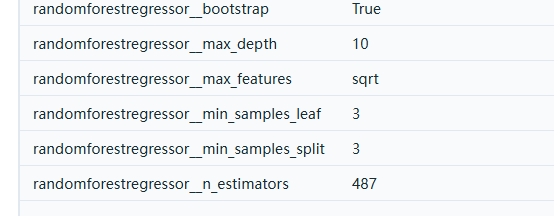

* test_MAE_Decision_Tree : 0
* test_MAE_Elastic_Net_Model: 90.94787133714232
* test_MAE_KNN_Model: 72.9516125
* test_MAE_Lasso_Model: 88.49007871291923
* test_MAE_LightGBM: 72.27273321862845
* test_MAE_LinearRegression: 88.48617772044808
* test_MAE_RandomForest: 32.36278125
* test_MAE_Ridge_Model: 88.48379572089787
* test_MAE_SVM_Model: 114.3980356752822
* test_MAE_XGBoost: 68.80092978668213

## Challenges and Lesson

Like every real-world project, this one came with a few hurdles:

Data enrichment: Connecting to APIs like USDA and ExerciseDB required handling API limits. This we could use this so settle for static meal plan from the life style dataset.

Output: The model output for the daily calorie intake prediction is a proxy for TDEE. We have to do as the dataset Lack a target variable. though is a close approximation. As more use the model and we get feedback it learns and give precise result. we just use that as a starting point.

Lack of Domain Knowledge. Extensive research were done on fitness, exercise and food. Though our understand is still insufficient as this will help build better models.

Team Collaboration and Timing: This was the major issue. With each one busy schedules and timing, we had to work at awkward hours and late nights.



Overall, the project taught us how to think beyond modeling — to combine data, and logic to make a system more realistic and useful.


## Future Work


There’s a lot of things we had in mind but our current skill level and understanding is not at par at the moment.
In the next phase, we plan to:

Add more personal features like age, activity level, medical conditions, or dietary preferences.

Include real-time data from fitness trackers (like Fitbit or Google Fit) for dynamic updates.

Use LLMs (Large Language Models) to rewrite and personalize meal/exercise plans in a friendly, conversational tone for each user.

Deploy the system as a Streamlit or web app so users can easily enter their details and get recommendations instantly.

Continuously retrain the model with user feedback to make the suggestions smarter over time.

## References & Acknowledgments

USDA FoodData Central API – for nutrition data and calorie information.

ExerciseDB API (via RapidAPI) – for exercise names, muscle groups, and calorie estimates.

Open-source fitness datasets from Kaggle – used as base data for training and testing.

Python libraries: pandas, scikit-learn, numpy, and Streamlit for model building and app development.

The material Hands on Machine learning was very valuable in this project

Chatgpt was also instrumental - brainstorming, demystifying concept and structuring process

A big thank you to the open-source community for providing the tools such mflow, dagsub, github and data that made this project possible.